In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


1. Data Cleaning

In [ ]:
df.isnull().sum()
#it seems there is no null value however when we check column values,we have null values.

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [ ]:
#check column values
for ex in df.columns:
 print(df[ex].value_counts())
  

4        5
4699     5
4710     5
4709     5
4708     5
        ..
24948    1
24949    1
24950    1
24951    1
26739    1
Name: Unnamed: 0, Length: 26736, dtype: int64
4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: NEIGHBORHOOD, Length: 254, dtype: int64
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP

In [ ]:
#delete column with no values
df.drop(['Unnamed: 0','APARTMENT NUMBER','EASE-MENT'],axis=1, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [ ]:
#Delete Sale Price 0 and - values
df=df[df['SALE PRICE'] !='0']
df=df[df['SALE PRICE'] != ' -  ']
df['SALE PRICE']=df['SALE PRICE'].astype(int)

In [ ]:
#replace - for 0 first and 0  for mean values for 'LAND SQUARE FEET','GROSS SQUARE FEET'. We prefer not to delete rows with 0 and '-' to keep more data
ex1=['LAND SQUARE FEET','GROSS SQUARE FEET']
for x in ex1:
  df[x]=df[x].replace(' -  ',0)
  df[x]=df[x].astype(int)
  vl=int (df[x].mean())
  df[x]=df[x].replace(0,vl)
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04,5.975900e+04,59759.000000,59759.000000,5.975900e+04
mean,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,3.635740e+03,3.431923e+03,1810.107599,1.629629,1.494927e+06
std,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,3.615489e+04,2.397148e+04,505.745865,0.706166,1.232953e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.300000e+01,1.200000e+02,0.000000,1.000000,1.000000e+00
25%,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,2.437000e+03,1.900000e+03,1920.000000,1.000000,3.700000e+05
50%,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,2.437000e+03,2.274000e+03,1940.000000,2.000000,6.255000e+05
75%,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,2.500000e+03,2.274000e+03,1966.000000,2.000000,1.070000e+06
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [ ]:
#Create Age column
df['Age']=pd.DatetimeIndex(df['SALE DATE']).year-df['YEAR BUILT']
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Age
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,117
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,103
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,116
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00,96
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,18
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,19
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,92
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,15


In [ ]:
#delete outlier if row values greater than absolute value of 3 for non categorical columns
from scipy import stats
ex2=['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE','Age','RESIDENTIAL UNITS','COMMERCIAL UNITS']
for x in ex2: 
  x2='z'+x
  df[x2]=stats.zscore(df[x])
  df = df[abs(df[x2])<3]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Age,zLAND SQUARE FEET,zGROSS SQUARE FEET,zSALE PRICE,zAge,zRESIDENTIAL UNITS,zCOMMERCIAL UNITS
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,117,-0.055394,0.207994,1.521282,-0.177311,1.482422,-0.010702
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,116,-0.035037,0.091673,1.909288,-0.179288,1.881394,-0.010702
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00,96,-0.052158,0.066879,0.552775,-0.218823,2.679338,-0.010702
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,2437,2274,1920,2,C6,1,2016-09-06 00:00:00,96,-0.033156,-0.057537,-0.348199,-0.218823,-0.512438,-0.010702
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,2437,2274,1920,2,C6,499000,2017-03-10 00:00:00,97,-0.033156,-0.057537,-0.207388,-0.216846,-0.512438,-0.010702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,10309,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00,22,0.206122,-0.064803,-0.165343,-0.365100,0.285506,-0.010702
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,18,-0.034179,-0.038352,-0.221215,-0.373007,0.285506,-0.010702
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,19,-0.031469,-0.050972,-0.192997,-0.371030,0.285506,-0.010702
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,92,0.010075,-0.107124,-0.218394,-0.226730,0.285506,-0.010702


In [ ]:
#delete z scores. I deleted  SALE DATE','YEAR BUILT' as it is used in Age . 
ex3=['zAge','zLAND SQUARE FEET',  'zGROSS SQUARE FEET', 'zSALE PRICE', 'zRESIDENTIAL UNITS', 'zCOMMERCIAL UNITS','SALE DATE','YEAR BUILT']
df.drop(ex3,inplace=True,axis=1)
df


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Age
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,2,C2,6625000,117
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,2,C2,8000000,116
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750,4226,2,C4,3192840,96
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,2437,2274,2,C6,1,96
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,2437,2274,2,C6,499000,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,10309,2,0,2,11088,2160,1,B2,648000,22
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1,B9,450000,18
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1,B9,550000,19
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1,B2,460000,92


In [ ]:
#correlation
df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE PRICE,Age
BOROUGH,1.000000,0.426600,-0.247850,0.539959,0.182798,0.011490,0.173028,0.165840,-0.113153,-0.369466,-0.332683,-0.072028
BLOCK,0.426600,1.000000,-0.242302,0.501224,0.114163,0.003381,0.104233,0.103947,-0.121519,-0.326227,-0.277502,0.060663
LOT,-0.247850,-0.242302,1.000000,-0.210154,-0.093181,-0.068494,-0.098103,-0.077474,0.004005,0.295831,0.201315,-0.442204
ZIP CODE,0.539959,0.501224,-0.210154,1.000000,0.180439,0.030947,0.180421,-0.004062,-0.024652,-0.180956,-0.220718,0.112809
RESIDENTIAL UNITS,0.182798,0.114163,-0.093181,0.180439,1.000000,0.015487,0.929836,-0.014523,0.138325,-0.406973,0.069844,0.128614
COMMERCIAL UNITS,0.011490,0.003381,-0.068494,0.030947,0.015487,1.000000,0.370655,0.199901,0.418394,0.329580,0.194122,0.063515
TOTAL UNITS,0.173028,0.104233,-0.098103,0.180421,0.929836,0.370655,1.000000,0.056387,0.279148,-0.230119,0.135421,0.132432
LAND SQUARE FEET,0.165840,0.103947,-0.077474,-0.004062,-0.014523,0.199901,0.056387,1.000000,0.420935,0.075193,0.124004,-0.001717
GROSS SQUARE FEET,-0.113153,-0.121519,0.004005,-0.024652,0.138325,0.418394,0.279148,0.420935,1.000000,0.360020,0.322497,-0.002892
TAX CLASS AT TIME OF SALE,-0.369466,-0.326227,0.295831,-0.180956,-0.406973,0.329580,-0.230119,0.075193,0.360020,1.000000,0.239671,-0.177543


2. Model and Analysis- 

In [ ]:
 #I deleted Total units since there is high correlation between total and residential units.
df.drop('TOTAL UNITS',inplace=True,axis=1)
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'Age'],
      dtype='object')

In [ ]:
#change categorical variable to category type as they have categorical values.
ex4=['BOROUGH','ZIP CODE','TAX CLASS AT TIME OF SALE']
for x in ex4:
 df[x]=df[x].astype('category')
df.dtypes

BOROUGH                           category
NEIGHBORHOOD                        object
BUILDING CLASS CATEGORY             object
TAX CLASS AT PRESENT                object
BLOCK                                int64
LOT                                  int64
BUILDING CLASS AT PRESENT           object
ADDRESS                             object
ZIP CODE                          category
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
LAND SQUARE FEET                     int64
GROSS SQUARE FEET                    int64
TAX CLASS AT TIME OF SALE         category
BUILDING CLASS AT TIME OF SALE      object
SALE PRICE                           int64
Age                                  int64
dtype: object

In [ ]:
#change object type to category type
for c in df.columns:
    col_type = df[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        df[c] = df[c].astype('category')
df.dtypes

BOROUGH                           category
NEIGHBORHOOD                      category
BUILDING CLASS CATEGORY           category
TAX CLASS AT PRESENT              category
BLOCK                                int64
LOT                                  int64
BUILDING CLASS AT PRESENT         category
ADDRESS                           category
ZIP CODE                          category
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
LAND SQUARE FEET                     int64
GROSS SQUARE FEET                    int64
TAX CLASS AT TIME OF SALE         category
BUILDING CLASS AT TIME OF SALE    category
SALE PRICE                           int64
Age                                  int64
dtype: object

In [ ]:
#Train test split
df3=df.copy()
y=df3['SALE PRICE']
df3=df3.drop('SALE PRICE',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2)

In [ ]:
df3.dtypes

BOROUGH                           category
NEIGHBORHOOD                      category
BUILDING CLASS CATEGORY           category
TAX CLASS AT PRESENT              category
BLOCK                                int64
LOT                                  int64
BUILDING CLASS AT PRESENT         category
ADDRESS                           category
ZIP CODE                          category
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
LAND SQUARE FEET                     int64
GROSS SQUARE FEET                    int64
TAX CLASS AT TIME OF SALE         category
BUILDING CLASS AT TIME OF SALE    category
Age                                  int64
dtype: object

In [ ]:
#Identify categorical variables
categorical_features_indices = np.where(df3.dtypes == 'category')[0]

categorical_features_indices

array([ 0,  1,  2,  3,  6,  7,  8, 13, 14])

In [ ]:
# I will use catboost since it can handle categorical variables without changing categorical variables into dummy variables
#With hyper parameter tuning, it is possible to increase performance of classifier.
!pip install catboost
import catboost as cb

train_dataset = cb.Pool(X_train, y_train,cat_features=categorical_features_indices) 
test_dataset = cb.Pool(X_test, y_test,cat_features=categorical_features_indices)
model = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
grid = {'iterations': [100,  200],
        'learning_rate': [0.01, 0.1],
        'depth': [2,  8],
        'l2_leaf_reg': [0.2, 2]}
model.grid_search(grid, train_dataset)

0:	learn: 1543658.5837990	test: 1540466.9620496	best: 1540466.9620496 (0)	total: 16.6ms	remaining: 1.64s
1:	learn: 1535834.0263529	test: 1532473.3994279	best: 1532473.3994279 (1)	total: 34.6ms	remaining: 1.69s
2:	learn: 1528070.1505310	test: 1524762.6897960	best: 1524762.6897960 (2)	total: 43.2ms	remaining: 1.4s
3:	learn: 1520316.6723875	test: 1517079.7773125	best: 1517079.7773125 (3)	total: 57ms	remaining: 1.37s
4:	learn: 1512960.1468854	test: 1509681.1927025	best: 1509681.1927025 (4)	total: 67.2ms	remaining: 1.28s
5:	learn: 1505564.5467968	test: 1502366.9442862	best: 1502366.9442862 (5)	total: 79.4ms	remaining: 1.24s
6:	learn: 1498324.9268961	test: 1495156.3340231	best: 1495156.3340231 (6)	total: 88ms	remaining: 1.17s
7:	learn: 1491233.0288510	test: 1487994.3731648	best: 1487994.3731648 (7)	total: 96.6ms	remaining: 1.11s
8:	learn: 1484133.0733706	test: 1480889.1953881	best: 1480889.1953881 (8)	total: 105ms	remaining: 1.06s
9:	learn: 1477297.0006332	test: 1474053.7129983	best: 1474053

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
#Let's evaluate performance of model on test and training data using RMSE and r2.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
predTR = model.predict(X_train)
rmseTR = (np.sqrt(mean_squared_error(y_train, predTR)))
r2TR = r2_score(y_train, predTR)
print('Train performance')
print('RMSE: {:.2f}'.format(rmseTR))
print('R2: {:.2f}'.format(r2TR))

Testing performance
RMSE: 728986.70
R2: 0.63
Train performance
RMSE: 672549.99
R2: 0.70


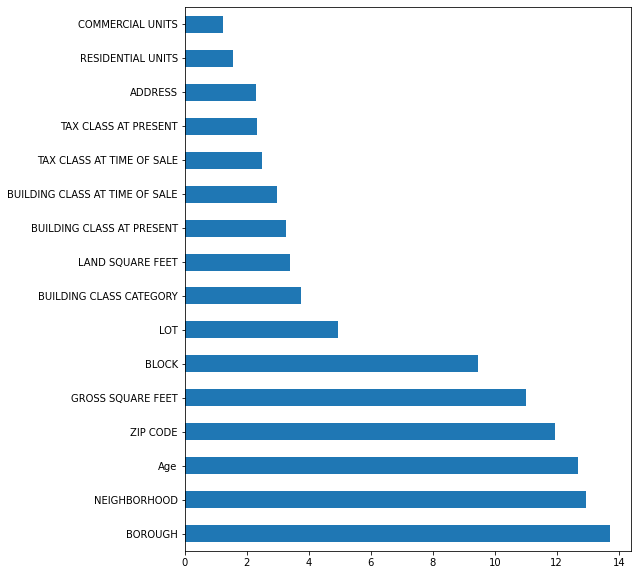

In [ ]:
#To get the most important features, I used feature get_feature_importance() of CatBoost
feat_imp = pd.Series(model.get_feature_importance(), index=df3.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))
#It seems that size, location and age is important for Sale Price